<a href="https://colab.research.google.com/github/alessandrotofani/Tesi_magistrale/blob/master/4_SHAP_centralized_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install --quiet shap==0.39.0
!pip install --quiet fastai==2.2.5

In [3]:
import sys 
sys.path.append('/content/drive/MyDrive/Tesi_magistrale/Tesi_magistrale')
import mf

# Dataset import

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Tesi_magistrale/Dataset/IEEE/Output/data.csv')
data = mf.new_processing(data)
data = pd.get_dummies(data)

# Model import

In [5]:
pd.options.mode.chained_assignment = None
X_test = mf.get_set('test_id', data, 'centralized_mlp')
del data

In [6]:
load = True
if load:
  from tensorflow import keras
  model = keras.models.load_model('/content/drive/MyDrive/Tesi_magistrale/Dataset/IEEE/Output/centralized_mlp/centralized_mlp')

# SHAP

In [7]:
import shap
explainer = shap.KernelExplainer(model.predict, shap.sample(X_test,50))

In [8]:
def get_fraud_id(model, X_test, soglia = 0.5, punti = 20):
  import random
  predictions = model.predict(X_test.to_numpy())
  lista = [i for i,x in enumerate(predictions) if x>soglia]
  return random.sample(lista, punti)

indici = get_fraud_id(model, X_test)
lista = np.random.randint(100, 10000, size = 20).tolist()

In [9]:
# z = X_test.iloc[indici+lista]
# kernel_shap = explainer.shap_values(z) #sono i valori di shapley

In [10]:
# np.save('shap_values_all',kernel_shap[0])

In [11]:
kernel_shap = np.load('/content/drive/MyDrive/Tesi_magistrale/Dataset/IEEE/Output/centralized_mlp/shap_values_all.npy')

In [12]:
# predictions = xgb.predict_proba(z.to_numpy())

In [13]:
feature_names = X_test.columns

In [14]:
shap.initjs()
shap.force_plot(explainer.expected_value, kernel_shap[0,:], z.to_numpy()[0], feature_names=feature_names)

In [15]:
shap.initjs()
shap.force_plot(explainer.expected_value, kernel_shap[1,:], z.to_numpy()[1], feature_names=feature_names)

In [16]:
shap.initjs()
shap.force_plot(explainer.expected_value, kernel_shap[2,:], z.to_numpy()[2], feature_names=feature_names)

In [17]:
shap.initjs()
shap.force_plot(explainer.expected_value, kernel_shap[3,:], z.to_numpy()[3], feature_names=feature_names)

In [18]:
shap.initjs()
shap.force_plot(explainer.expected_value, kernel_shap[8,:], z.to_numpy()[8], feature_names=feature_names)

In [19]:
shap.initjs()
shap.force_plot(explainer.expected_value, kernel_shap[12,:], z.to_numpy()[12], feature_names=feature_names)

In [20]:
shap.initjs()
shap.force_plot(explainer.expected_value, kernel_shap[13,:], z.to_numpy()[13], feature_names=feature_names)

In [21]:
shap.initjs()
shap.force_plot(explainer.expected_value, kernel_shap[14,:], z.to_numpy()[14], feature_names=feature_names)

In [22]:
shap.initjs()
shap.force_plot(explainer.expected_value, kernel_shap[4,:], z.to_numpy()[4], feature_names=feature_names)

In [23]:
shap.initjs()
shap.force_plot(explainer.expected_value, kernel_shap[5,:], z.to_numpy()[5], feature_names=feature_names)

In [24]:
shap.initjs()
shap.force_plot(explainer.expected_value, kernel_shap[-1,:], z.to_numpy()[-1], feature_names=feature_names)

In [25]:
shap.initjs()
shap.force_plot(explainer.expected_value, kernel_shap[-2,:], z.to_numpy()[-2], feature_names=feature_names)

In [26]:
shap.initjs()
shap.force_plot(explainer.expected_value, kernel_shap[-3,:], z.to_numpy()[-3], feature_names=feature_names)

In [27]:
shap.initjs()
shap.force_plot(explainer.expected_value, kernel_shap[-4,:], z.to_numpy()[-4], feature_names=feature_names)

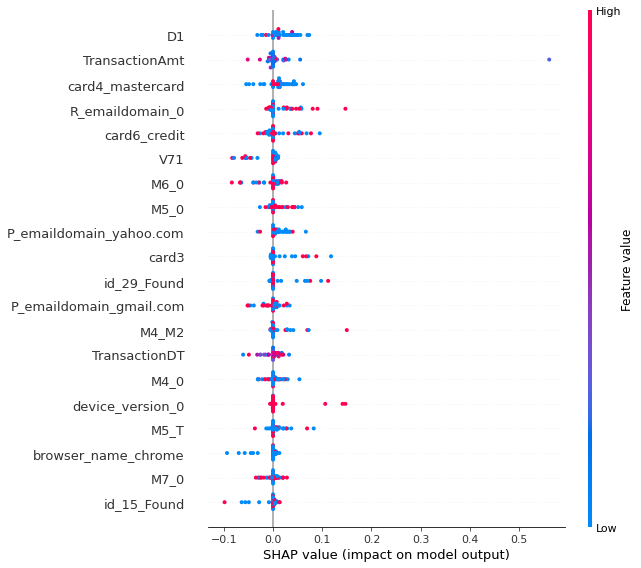

In [28]:
shap.summary_plot(kernel_shap, z.to_numpy(), feature_names=feature_names)

Decision plot: https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/decision_plot.html?highlight=plot

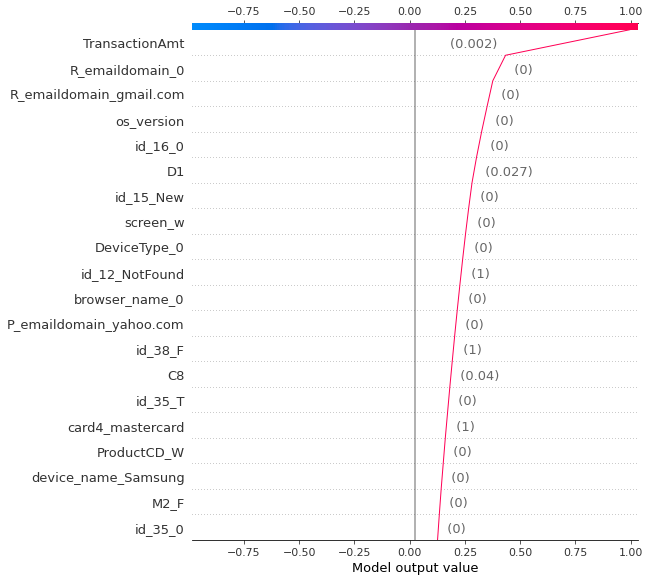

In [29]:
shap.decision_plot(explainer.expected_value, kernel_shap[0,:], z.to_numpy()[0], feature_names=feature_names.to_list())

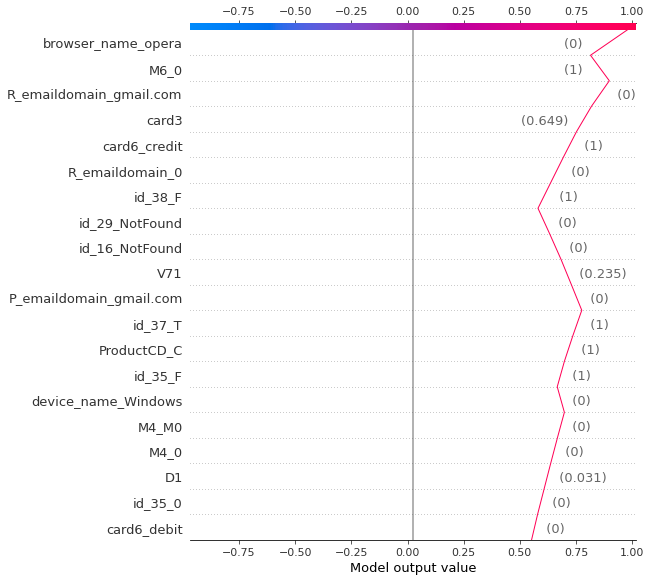

In [30]:
shap.decision_plot(explainer.expected_value, kernel_shap[1,:], z.to_numpy()[1], feature_names=feature_names.to_list())

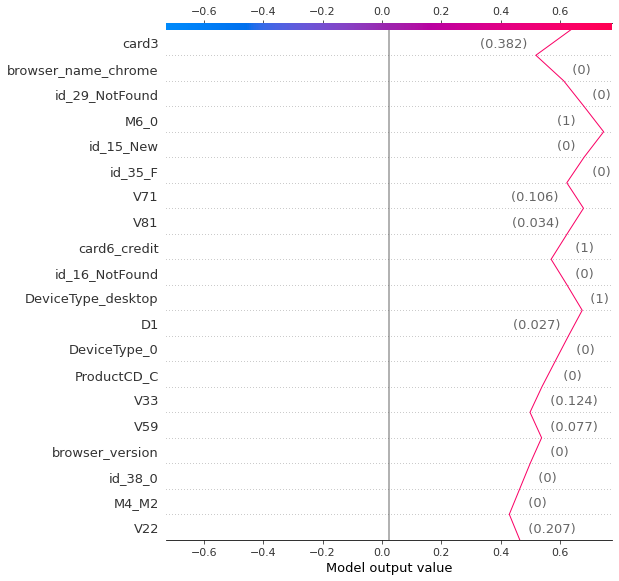

In [31]:
shap.decision_plot(explainer.expected_value, kernel_shap[2,:], z.to_numpy()[2], feature_names=feature_names.to_list())

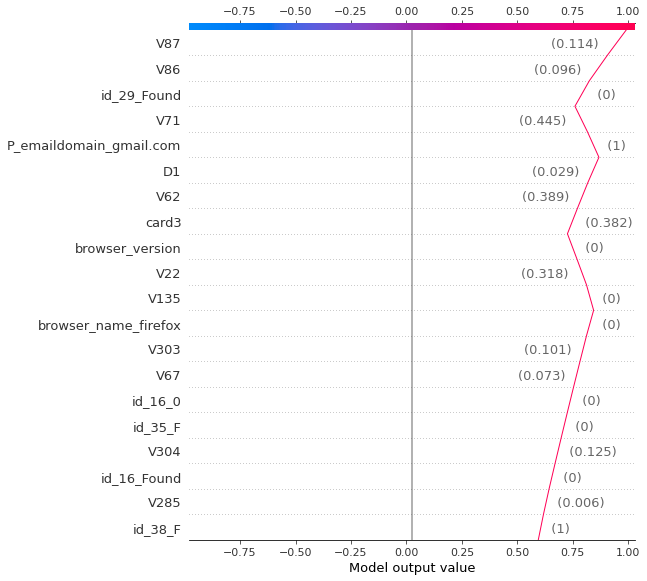

In [32]:
shap.decision_plot(explainer.expected_value, kernel_shap[3,:],z.to_numpy()[3], feature_names=feature_names.to_list())